# Milestone 1 - Independent Project

## Author - Aeden Jameson



## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience. Your solution must include narrative in plain language explaining your results. 
3. Visually explore the data to generate insight and include summary statistics.
4. Visually explore the data to generate insight and include summary statistics. For your visualization use multiple views of the data, which can include:

    - scatter plots showing key relationships you have found in the dataset. Beware of over-plotting. 
    - bar, box or violin plots for various categorical groups within the dataset. 
    - Faceted plots to show diffences for different groups with in the data. 
    - Other plot types you find useful; heatmaps, histograms, etc. 
    - All plots should use methods that will aid in viewer perception. 

## Problem

Prioritze the exploration of key relationships to predict the prices of houses in King County.

## Conclusion

The visual explorations below lend themselves to a few initial observations

* Higher prices are positively correlated with the square feet for living offered by a dwelling 

* Higher grade and higher priced homes are concentrated in particular neighborhoods. Similiarly 
  lower grade and lower prices homes are as well.
  
Note: Tried doing some line plots with median home prices month over month, but couldn't figure out the errors I was getting.

## Load and Examine Data

Here's a data dictionary for reference

* **id**   - Unique ID for each home sold 
* **date** - Date of the home sale 
* **price** - Price of each home sold 
* **bedrooms** - Number of bedrooms 
* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
* **sqft_living** - Square footage of the apartments interior living space 
* **sqft_lot** - Square footage of the land space 
* **floors** - Number of floors 
* **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not 
* **view** - An index from 0 to 4 of how good the view of the property was 
* **condition** - An index from 1 to 5 on the condition of the apartment, 
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 
* **sqft_above** - The square footage of the interior housing space that is above ground level 
* **sqft_basement** - The square footage of the interior housing space that is below ground level 
* **yr_built** - The year the house was initially built 
* **yr_renovated** - The year of the house’s last renovation 
* **zipcode** - What zipcode area the house is in 
* **lat** - Lattitude 
* **long** - Longitude 
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors 
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

def prepare(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"):
    data = pd.read_csv(fileName)

    # fix data types
    data['date'] = pd.to_datetime(data['date'])
    
    # 20699 of the 21613 rows don't have a value so we'll drop this column
    data.drop('yr_renovated', axis = 1, inplace = True)
    
    to_drop = housing.loc[(housing['bedrooms'] > 7) | 
                          (housing['bathrooms'] > 5) | 
                          (housing['bathrooms'] < 1) | 
                          (housing['sqft_lot'] > 300000) | 
                          (housing['price'] > 1000000) | 
                          (housing['price'] < 100000) | 
                          (housing['grade'] < 5)].index
    housing.drop(to_drop, inplace = True)
    
    return data

housing = prepare()

First, lets get a feel for the size and types of data we are dealing with so we can understand what kinds of visualizations might be helpful for uncovering relationships.

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.3 MB


In [31]:
columns_for_stats = housing.columns.tolist()
columns_for_stats.remove("id")
columns_for_stats.remove("zipcode")
columns_for_stats.remove("waterfront")
housing[columns_for_stats].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Explore Key Quantitative Variables

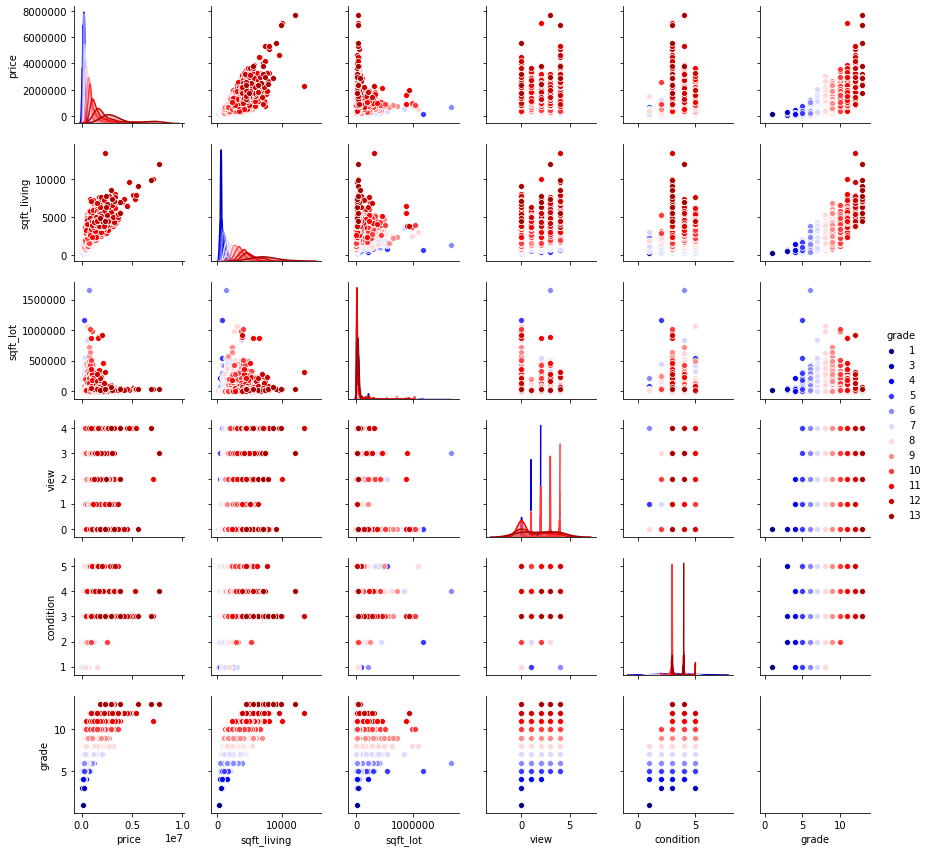

In [55]:
pair_plot_cols = ["price", "sqft_living", "sqft_lot", "view", "condition", "grade"] 
sns.pairplot(housing.loc[:, pair_plot_cols], hue='grade', 
             palette="seismic", diag_kind="kde", 
             size=2)

### Obervations
* grade increase with price
* price increases with sqft_living 

## How are Prices Distributed Among Zip Codes?

As we know some neighborhoods are wealthier than others. We can use a heatmap to help us understand the distribution of prices
among the zip codes.

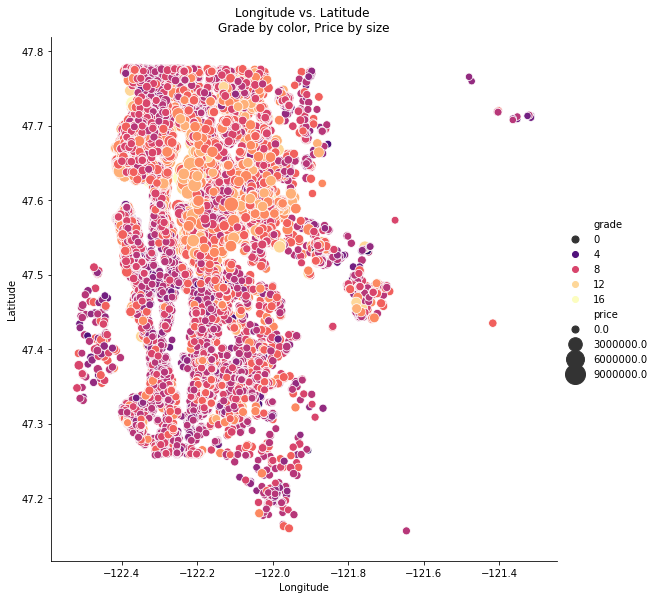

In [53]:
ax = sns.relplot(x = 'long', y = 'lat', hue = 'grade', 
                 size='price', sizes = (50.0, 400.0), 
                 palette = 'magma', data=housing, 
                 height = 8, aspect=1/1)
ax.set(title ='Longitude vs. Latitude \nGrade by color, Price by size', # Give the plot a main title
       xlabel = 'Longitude', # Set text for the x axis
       ylabel = 'Latitude') # Set text for y axis 

While it's cerainly difficult to gather specific quantitative observations from the scatter plot above we certainly get the sense that high grade homes go for a higher price in certain neighborhoods. Let's break it down with a heatmap.

Text(0.5, 1.0, 'Price ranges of houses by zipcode')

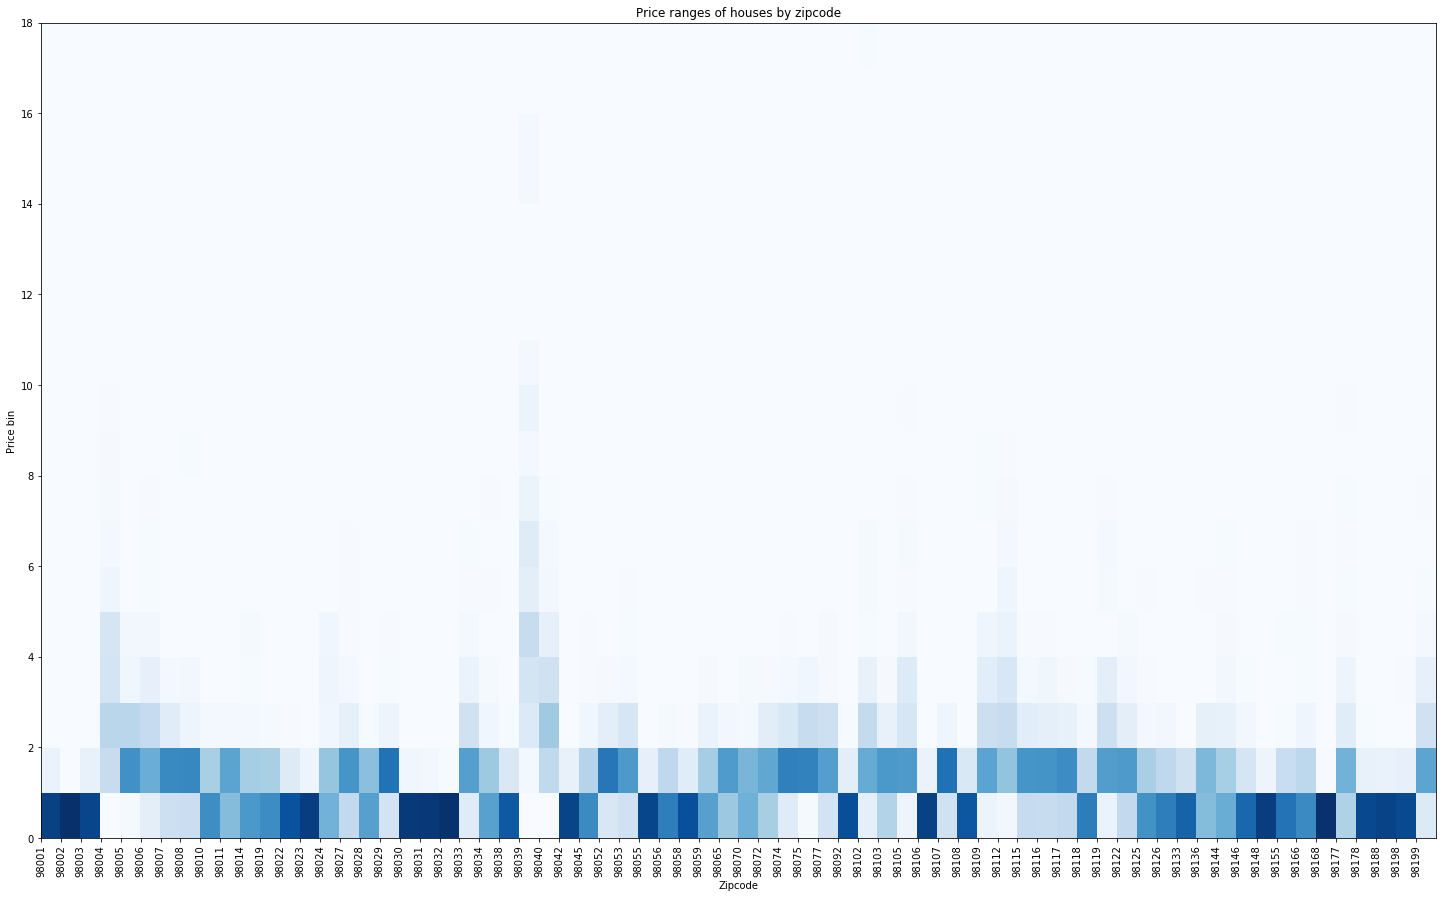

In [46]:
housing.loc[:, 'price_bin'] = pd.cut(housing.loc[:, 'price'], bins = 20, labels = range(20))
housing.loc[:, 'price_bin'].head(10)
make_price = pd.crosstab(housing.loc[:, 'price_bin'], housing.loc[:, 'zipcode'])
num_cars = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_cars, axis = 1)
ax = plt.figure(figsize=(25, 15)).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns, rotation=90)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price bin')
ax.set_title('Price ranges of houses by zipcode')

### Observations

* We can see zipcodes such as 98004, 98039, 98040, 98109, and 98112 have a number homes that sell on the high end. While zipcodes 98001, 98031, 98032, 98178, 98188 tend sell a lot of homes at lower prices.